In [1]:
!pip install tensorflow

In [2]:
!pip install torch torchvision

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Define data transformations to normalize the pixel values
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset using PyTorch
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a simple neural network using TensorFlow's Keras API
model_tf = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the TensorFlow model
optimizer_tf = keras.optimizers.Adam()
model_tf.compile(optimizer=optimizer_tf,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


# Define a PyTorch CNN model
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define a PyTorch FNN model
class FNNNet(nn.Module):
    def __init__(self):
        super(FNNNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create instances of the PyTorch CNN and FNN models and define their optimizers and loss
cnn_net = CNNNet()
cnn_optimizer = optim.Adam(cnn_net.parameters(), lr=0.001)
cnn_criterion = nn.CrossEntropyLoss()  # Define the loss function for CNN

fnn_net = FNNNet()
fnn_optimizer = optim.Adam(fnn_net.parameters(), lr=0.001)
fnn_criterion = nn.CrossEntropyLoss()  # Define the loss function for FNN

# Training loop for the CNN model
for epoch in range(5):  # Change the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        cnn_optimizer.zero_grad()
        outputs = cnn_net(inputs)
        loss = cnn_criterion(outputs, labels)  # Calculate the loss using the defined criterion
        loss.backward()
        cnn_optimizer.step()
        running_loss += loss.item()
    print(f"PyTorch CNN: Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

print('PyTorch CNN: Finished Training')

# Training loop for the FNN model
for epoch in range(5):  # Change the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        fnn_optimizer.zero_grad()
        inputs = inputs.view(-1, 28 * 28)  # Flatten the input for FNN
        outputs = fnn_net(inputs)
        loss = fnn_criterion(outputs, labels)  # Calculate the loss using the defined criterion
        loss.backward()
        fnn_optimizer.step()
        running_loss += loss.item()
    print(f"PyTorch FNN: Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

print('PyTorch FNN: Finished Training')

# Test the CNN model
cnn_correct = 0
cnn_total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = cnn_net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        cnn_total += labels.size(0)
        cnn_correct += (predicted == labels).sum().item()

print(f'PyTorch CNN: Accuracy on the test images: {100 * cnn_correct / cnn_total}%')

# Test the FNN model
fnn_correct = 0
fnn_total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(-1, 28 * 28)  # Flatten the input for FNN
        outputs = fnn_net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        fnn_total += labels.size(0)
        fnn_correct += (predicted == labels).sum().item()

print(f'PyTorch FNN: Accuracy on the test images: {100 * fnn_correct / fnn_total}%')


PyTorch CNN: Epoch 1, Loss: 0.15240166577071682
PyTorch CNN: Epoch 2, Loss: 0.0469165980117892
PyTorch CNN: Epoch 3, Loss: 0.031657262984917674
PyTorch CNN: Epoch 4, Loss: 0.023151194340775165
PyTorch CNN: Epoch 5, Loss: 0.018675483796138145
PyTorch CNN: Finished Training
PyTorch FNN: Epoch 1, Loss: 0.3976228711193304
PyTorch FNN: Epoch 2, Loss: 0.18836131573581238
PyTorch FNN: Epoch 3, Loss: 0.1414541090036363
PyTorch FNN: Epoch 4, Loss: 0.11358058098743339
PyTorch FNN: Epoch 5, Loss: 0.09867179442717354
PyTorch FNN: Finished Training
PyTorch CNN: Accuracy on the test images: 99.16%
PyTorch FNN: Accuracy on the test images: 96.74%


In [9]:
# Training loop for TensorFlow model
tf_train_images = trainset.data.numpy() / 255.0
tf_train_labels = trainset.targets.numpy()

model_tf.fit(tf_train_images, tf_train_labels, epochs=5, batch_size=64, verbose=1)


Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.9168
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1336 - accuracy: 0.9611
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0940 - accuracy: 0.9724
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0716 - accuracy: 0.9785
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0566 - accuracy: 0.9832


In [10]:
# Test the TensorFlow model
tf_test_images = testset.data.numpy() / 255.0
tf_test_labels = testset.targets.numpy()

test_loss, test_acc = model_tf.evaluate(tf_test_images, tf_test_labels, verbose=0)
print(f'TensorFlow: Test accuracy: {100 * test_acc}%')


TensorFlow: Test accuracy: 97.69999980926514%


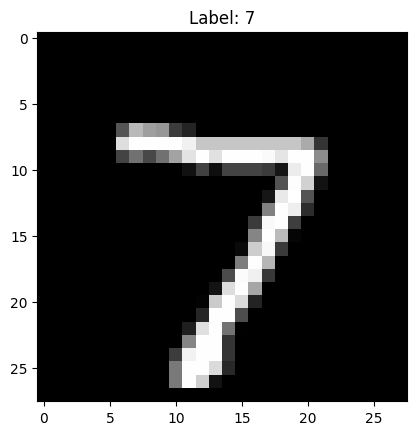

In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)
image = images[0].numpy()
plt.imshow(np.squeeze(image), cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.show()